In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

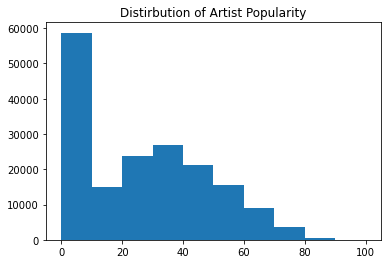

In [40]:
#load final data set as spotify
spotify = pd.read_csv("data.csv")
spotify.head(5)

#calculate the popularity mean so we can make popularity a binary variable in following steps
popularity_mean = np.mean(spotify['popularity'])
popularity_mean

plt.hist(spotify['popularity'])
plt.title('Distirbution of Artist Popularity')
spotify['popularity'].describe()

In [41]:
#Going to drop the name, relesase date, id since it is not significant to the dependant variable, and we have season in lieu of release date
spotify = spotify.drop(['name', 'artists', 'release_date', 'id'], axis = 1)
#dummy variable for season
season_dum = pd.get_dummies(spotify['Season'])
spotify['Season'] = season_dum

In [42]:
#see the scale of each parameter to see the need to scale them.
spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,...,Season,Name Length,live,love,mix,no,op,remast,version,year_y
count,174389.000000,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,...,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,87194.000000,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,...,0.151403,4.673099,0.029870,0.036034,0.024766,0.027261,0.024503,0.066145,0.024451,0.023688
std,50341.912384,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,...,0.358442,3.301915,0.172105,0.190515,0.169057,0.174373,0.155160,0.248583,0.155371,0.152942
min,0.000000,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43597.000000,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87194.000000,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,130791.000000,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,174388.000000,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,...,1.000000,44.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [43]:
#need to drop first unname coloum since it is just an index. Need to Re-scale features since it ranges from 0-1 to 10.
spotify = spotify.drop('Unnamed: 0', 1)

#import minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [44]:
spotify.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
valence             float64
year_x                int64
Collaboration         int64
Season                uint8
Name Length           int64
live                  int64
love                  int64
mix                   int64
no                    int64
op                    int64
remast                int64
version               int64
year_y                int64
dtype: object

In [45]:
#all numerical variable that needs to be scaled
numerical_var = ['acousticness', 'danceability', 'duration_ms','energy','instrumentalness','key', 'liveness', 'loudness','speechiness','tempo','valence']

#rescale all numerical variables 
spotify[numerical_var] = scaler.fit_transform(spotify[numerical_var])
spotify

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,Season,Name Length,live,love,mix,no,op,remast,version,year_y
0,0.994980,0.605263,0.030637,0.224,0,0.000522,0.454545,0.3790,0.741868,0,...,0,6,0,0,0,0,0,0,0,0
1,0.645582,0.862348,0.027237,0.517,0,0.026400,0.454545,0.0809,0.825918,0,...,0,6,0,0,0,0,0,0,0,0
2,0.996988,0.654858,0.029792,0.186,0,0.000018,0.000000,0.5190,0.750168,1,...,0,2,0,0,0,0,0,0,0,0
3,0.000174,0.738866,0.078215,0.798,0,0.801000,0.181818,0.1280,0.825135,1,...,0,10,0,0,0,0,0,0,0,0
4,0.296185,0.712551,0.030054,0.707,1,0.000246,0.909091,0.4020,0.845102,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009207,0.801619,0.026752,0.866,0,0.000060,0.545455,0.1780,0.859933,0,...,0,2,0,0,0,0,0,0,0,0
174385,0.798193,0.434211,0.026209,0.211,0,0.000000,0.363636,0.1960,0.756949,1,...,0,3,0,0,0,0,0,0,0,0
174386,0.809237,0.679150,0.039977,0.589,0,0.920000,0.363636,0.1130,0.745549,0,...,0,1,0,0,0,0,0,0,0,0
174387,0.923695,0.467611,0.044824,0.240,1,0.000000,0.000000,0.1130,0.750497,1,...,0,2,0,0,0,0,0,0,0,0


In [46]:
#modify dataframe to treat popularity as a binary variable
def popularity(c):
    if c['popularity'] > popularity_mean:
        return 1
    else:
        return 0


In [47]:
#set popularity as a binary column: 1 means popular 0 means unpopular
spotify['popularity'] = spotify.apply(popularity, axis = 1)

In [48]:
#split test and training data 30% test, 70% training set

from sklearn.model_selection import train_test_split

spotify_train, spotify_test = train_test_split(spotify, test_size=0.3, random_state=88)
spotify_train.shape, spotify_test.shape

((122072, 26), (52317, 26))

In [49]:
#compose the x and y corresponding data for train and test set
x_train = spotify_train.drop(['popularity'], axis =1)
y_train = spotify_train[['popularity']]

x_test = spotify_test.drop(['popularity'], axis =1)
y_test = spotify_test[['popularity']]

In [50]:
import statsmodels.api as smf
#building model and fitting data
log_reg = smf.Logit(y_train, x_train).fit()

#visualize summary. 
# define p value cut off as 0.05.
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.523117
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:               122072
Model:                          Logit   Df Residuals:                   122047
Method:                           MLE   Df Model:                           24
Date:                Thu, 06 May 2021   Pseudo R-squ.:                  0.2453
Time:                        12:32:52   Log-Likelihood:                -63858.
converged:                       True   LL-Null:                       -84613.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        -1.9143      0.030    -63.706      0.000      -1.973      -1.855
danceabilit

In [51]:
#p-value for most are lower than cutoff of 0.05. Only four are above: key, tempo, remast, version
#retrain model without these four variables
x_train = x_train.drop(['key', 'tempo', 'remast', 'version'], 1)

x_train

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,...,year_x,Collaboration,Season,Name Length,live,love,mix,no,op,year_y
67798,0.439759,0.750000,0.030334,0.5940,0,0.771000,0.1020,0.803727,1,0.038929,...,1976,0,0,1,0,0,0,0,0,0
170292,0.017470,0.797571,0.041807,0.4700,0,0.723000,0.1830,0.727194,1,0.046138,...,2020,0,0,3,0,0,0,0,0,0
57359,0.017269,0.813765,0.054199,0.5300,0,0.010200,0.1110,0.705677,1,0.077240,...,2020,0,1,4,0,0,0,0,0,0
21990,0.914659,0.655870,0.034064,0.1320,0,0.000000,0.2680,0.703735,1,0.043872,...,1933,0,0,7,0,0,0,0,0,0
13990,0.304217,0.673077,0.055217,0.8990,0,0.000002,0.4450,0.818260,1,0.090319,...,1990,0,1,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90474,0.104418,0.659919,0.052849,0.6300,1,0.000000,0.0299,0.819137,0,0.367662,...,2003,1,0,5,0,0,0,0,0,0
133553,0.135542,0.397773,0.036222,0.4190,0,0.048100,0.0852,0.751343,1,0.029866,...,1973,0,0,9,0,0,0,0,0,0
36815,0.231928,0.459514,0.065168,0.5340,0,0.818000,0.1370,0.788991,0,0.040268,...,2016,0,1,1,0,0,0,0,0,0
104736,0.158635,0.336032,0.057936,0.2790,0,0.158000,0.0838,0.695310,1,0.030999,...,1992,0,0,1,0,0,0,0,0,0


In [52]:
#train model once again with updated x_train
log_reg = smf.Logit(y_train, x_train).fit()

#visualize summary. 
# define p value cut off as 0.05.
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.523140
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:               122072
Model:                          Logit   Df Residuals:                   122051
Method:                           MLE   Df Model:                           20
Date:                Thu, 06 May 2021   Pseudo R-squ.:                  0.2453
Time:                        13:28:16   Log-Likelihood:                -63861.
converged:                       True   LL-Null:                       -84613.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness        -1.9110      0.030    -63.901      0.000      -1.970      -1.852
danceabilit

In [53]:
#define y_hat as the predicted value of y for test dataset
#drop the four coloumns that we dropped for x_train on x_test
x_test = x_test.drop(['key', 'tempo', 'remast', 'version'], 1)
y_hat = log_reg.predict(x_test)
prediction = list(map(round, y_hat))

from sklearn.metrics import (confusion_matrix,
                            accuracy_score)

#confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion matrixx : \n", cm)

Confusion matrixx : 
 [[18831  7329]
 [ 5858 20299]]


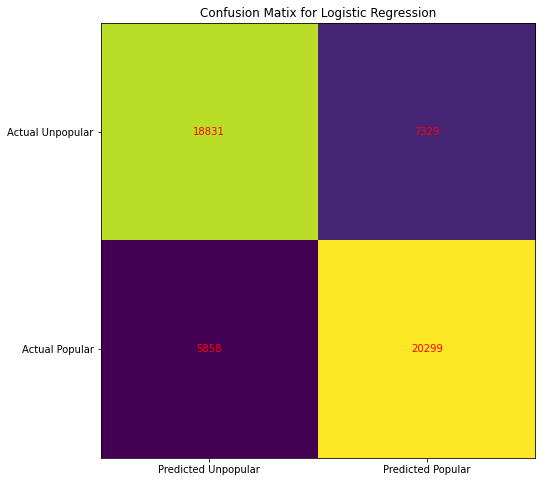

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Unpopular', 'Predicted Popular'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Unpopular', 'Actual Popular'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title('Confusion Matix for Logistic Regression')
plt.show()


In [55]:
#accuracy of the model
print('Test Accuracy = ', accuracy_score(y_test, prediction))

Test Accuracy =  0.7479404400099394
